## Python / Visualization / Census bureau dataset (2)

### Importing libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing and cleaning dataset

In [13]:
# Reading dataset into a pandas dataframe

col = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'target']
df = pd.read_csv('adult.csv')
df.columns = col
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [14]:
# Checking for missing values

df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [15]:
# Replacing '?' with NaN values and dropping the rows with NaN values

df.replace('?', np.nan, inplace = True)
df.dropna(inplace = True)

In [16]:
# Converting columns to numeric

df.apply(pd.to_numeric, errors = 'ignore')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Data visualization

#### 1. Histogram
Objective: To visualize the distribution of continuous variables.

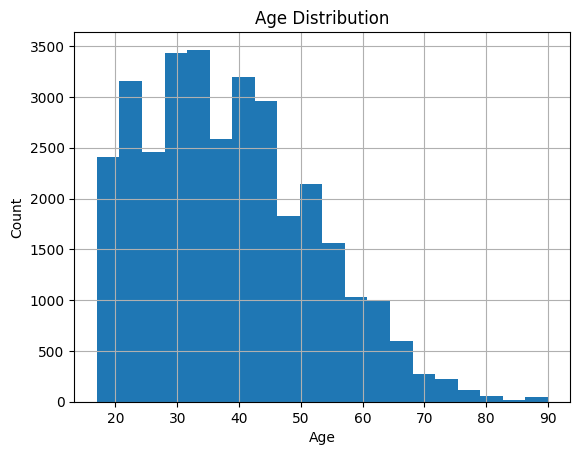

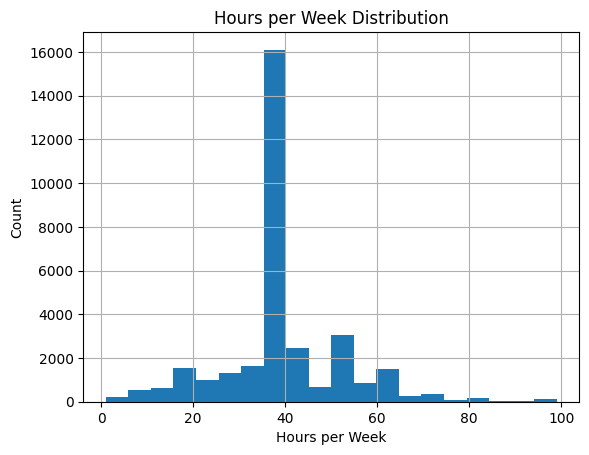

In [17]:
# Plot histogram for age
df['age'].hist(bins = 20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Plot histogram for hours-per-week
df['hours-per-week'].hist(bins = 20)
plt.title('Hours per Week Distribution')
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.show()

#### 2. Pie Charts
Objective: To visualize the proportions of different categories in a categorical variable.

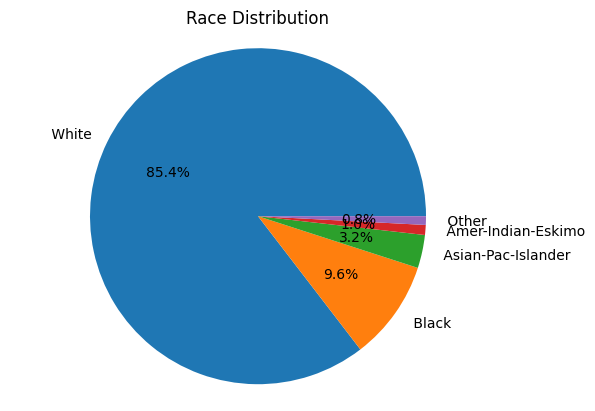

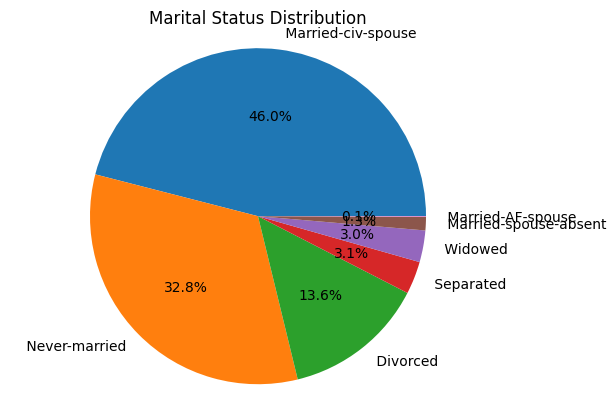

In [18]:
# Plot pie chart for race
race_counts = df['race'].value_counts()
plt.pie(race_counts, labels = race_counts.index, autopct = '%1.1f%%')
plt.title('Race Distribution')
plt.axis('equal')  # To make the pie chart circular
plt.show()

# Plot pie chart for marital status
marital_counts = df['marital-status'].value_counts()
plt.pie(marital_counts, labels = marital_counts.index, autopct = '%1.1f%%')
plt.title('Marital Status Distribution')
plt.axis('equal')
plt.show()

#### 3. Box Plots
Objective: To visualize the distribution of a continuous variable, including median, quartiles, and outliers.

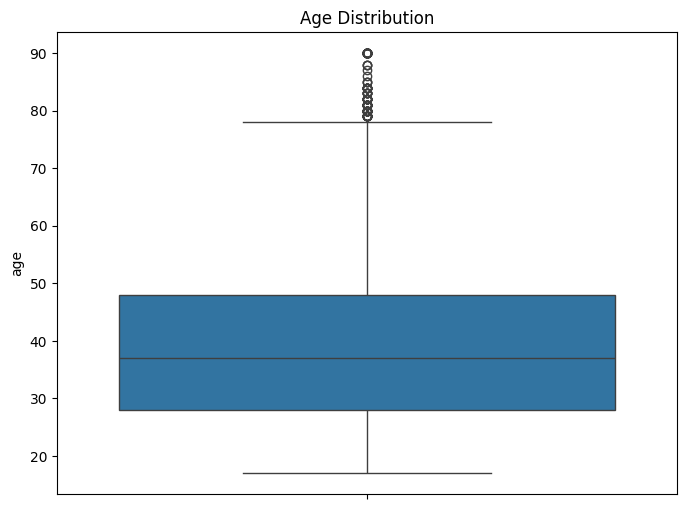

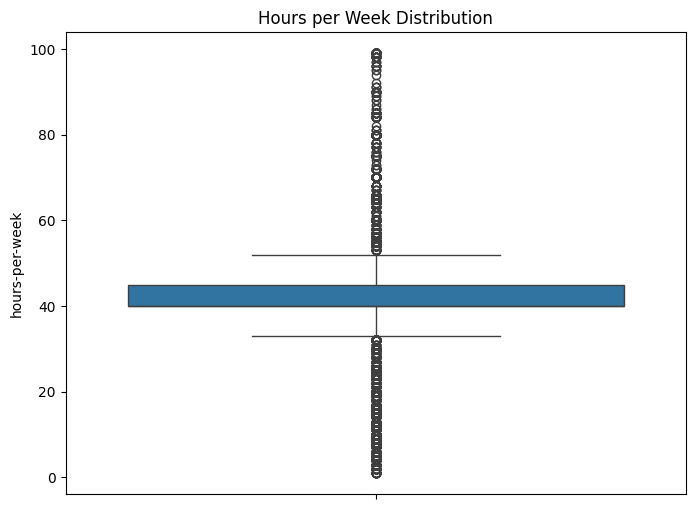

In [19]:
# Plot box plot for age
plt.figure(figsize = (8, 6))
sns.boxplot(data = df['age'])
plt.title('Age Distribution')
plt.show()

# Plot box plot for hours-per-week
plt.figure(figsize = (8, 6))
sns.boxplot(data = df['hours-per-week'])
plt.title('Hours per Week Distribution')
plt.show()

#### 4. Scatter Plots
Objective: To visualize the relationship between two continuous variables.

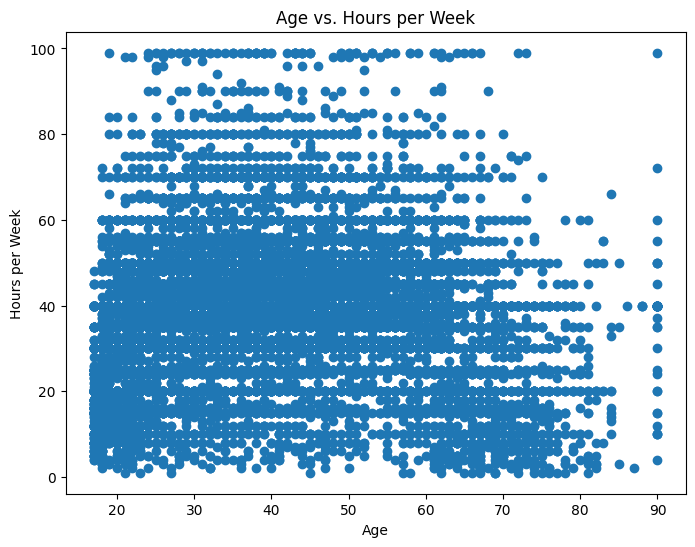

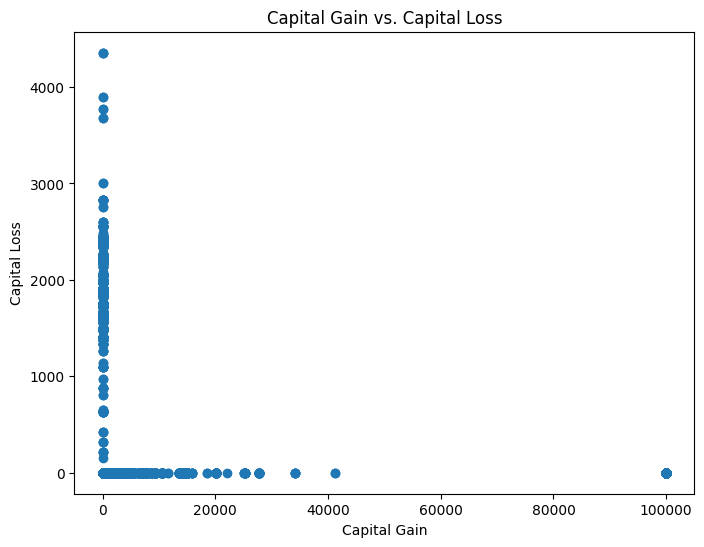

In [20]:
# Plot scatter plot for age vs. hours-per-week
plt.figure(figsize = (8, 6))
plt.scatter(df['age'], df['hours-per-week'])
plt.title('Age vs. Hours per Week')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.show()

# Plot scatter plot for capital-gain vs. capital-loss
plt.figure(figsize = (8, 6))
plt.scatter(df['capital-gain'], df['capital-loss'])
plt.title('Capital Gain vs. Capital Loss')
plt.xlabel('Capital Gain')
plt.ylabel('Capital Loss')
plt.show()

#### 5. Add Boxplots to a Scatterplot
Objective: To visualize the distribution of a continuous variable and its relationship with another continuous variable.

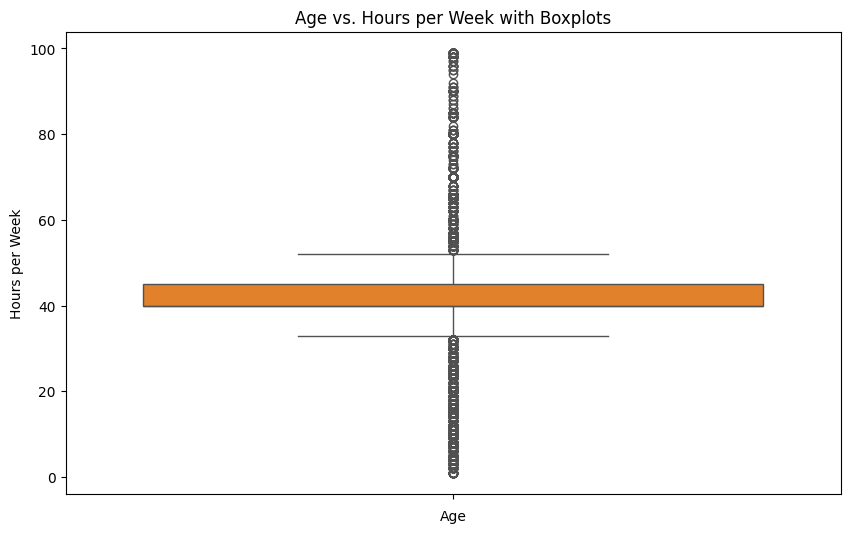

In [21]:
# Add boxplots to a scatterplot
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df, x = 'age', y = 'hours-per-week')
sns.boxplot(data = df['hours-per-week'], orient = 'v')
plt.title('Age vs. Hours per Week with Boxplots')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.show()